This KDD challenge as 3 predictive tasks, addressing **`churn`**, **`appetency`** and **`upselling`**. We'll tackle **`churn`** in this script. Doing **`appetency`** and **`upselling`** would be very similar.

_**Note:** This script takes a **long time** to run completely._

# _import modules:_

In [1]:
# enable In-Line MatPlotLib
%matplotlib inline

In [2]:
# import:
from __future__ import division, print_function
from matplotlib.pyplot import figure, legend, hist, plot, title
from multiprocessing import cpu_count
from numpy import allclose, exp, float, int, linspace, log, nan, sqrt
from os import system
from os.path import join
from pandas import Categorical, concat, DataFrame, get_dummies, read_table, Series
from random import seed
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

system('pip install --upgrade git+git://GitHub.com/ChicagoBoothML/Helpy --no-dependencies')
from ChicagoBoothML_Helpy.EvaluationMetrics import bin_class_dev, bin_classif_eval
from ChicagoBoothML_Helpy.Print import printflush

RANDOM_SEED = 99
seed(RANDOM_SEED)

# import KDD Cup 2009 Orange Customer Relationships data set

In [3]:
# ******************************************************************************************
# NOTE: the following path is specific to my computer
# You need to change it to a relevant folder on your computer containing the Orange data

data_folder_path = '/Cloud/Box Sync/Repos/DATA/DATA___KDDCup2009_OrangeCustomerRelationship'

# ******************************************************************************************

Parse **`churn`** data:

In [4]:
churn = read_table(
    join(data_folder_path, 'orange_small_train_churn.labels.txt').replace('\\', '/'),
    header=None).ix[:, 0].astype('category')

churn.cat.rename_categories(['no', 'yes'], inplace=True)

churn

0         no
1        yes
2         no
3         no
4         no
5         no
6         no
7         no
8         no
9         no
10        no
11        no
12        no
13        no
14        no
15        no
16        no
17        no
18        no
19       yes
20        no
21        no
22        no
23       yes
24        no
25        no
26        no
27        no
28        no
29        no
        ... 
49970     no
49971     no
49972     no
49973     no
49974     no
49975     no
49976     no
49977     no
49978     no
49979     no
49980     no
49981    yes
49982     no
49983     no
49984     no
49985     no
49986     no
49987     no
49988     no
49989     no
49990     no
49991     no
49992     no
49993     no
49994     no
49995     no
49996     no
49997     no
49998     no
49999     no
Name: 0, dtype: category
Categories (2, object): [no, yes]

In [5]:
na_strings = [
  '',
  'na', 'n.a', 'n.a.',
  'nan', 'n.a.n', 'n.a.n.',
  'NA', 'N.A', 'N.A.',
  'NaN', 'N.a.N', 'N.a.N.',
  'NAN', 'N.A.N', 'N.A.N.',
  'nil', 'Nil', 'NIL',
  'null', 'Null', 'NULL']

X = read_table(
    join(data_folder_path, 'orange_small_train.data.gz').replace('\\', '/'),
    na_values=na_strings)

x_var_names = X.columns
#cs.loc[:, 'SeriousDlqin2yrs'] = Categorical(cs.SeriousDlqin2yrs)

#nb_samples = len(cs)

#cs
X

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526,7,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525,0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236,7,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029,7,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN
5,NaN,NaN,NaN,NaN,NaN,658,7,NaN,NaN,NaN,...,zCkv,QqVuch3,LM8l689qOp,NaN,NaN,Qcbd,02N6s8f,Zy3gnGM,am7c,NaN
6,NaN,NaN,NaN,NaN,NaN,1680,7,NaN,NaN,NaN,...,oslk,XlgxB9z,LM8l689qOp,NaN,kG3k,FSa2,RAYp,55YFVY9,am7c,NaN
7,NaN,NaN,NaN,NaN,NaN,77,0,NaN,NaN,NaN,...,oslk,R2LdzOv,NaN,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,1176,7,NaN,NaN,NaN,...,zCkv,K2SqEo9,jySVZNlOJy,NaN,kG3k,PM2D,6fzt,am14IcfM7tWLrUmRT52KtA,am7c,NaN
9,NaN,NaN,NaN,NaN,NaN,1141,7,NaN,NaN,NaN,...,oslk,EPqQcw6,LM8l689qOp,NaN,kG3k,FSa2,RAYp,55YFVY9,NaN,NaN


Let's convert **integer** columns to **float**, and **non-integer**, **non-float** columns to **categorical**:

In [6]:
x_types = {x_var_name: X[x_var_name].dtype for x_var_name in x_var_names}

for x_var_name in x_var_names:
    if x_types[x_var_name] == int:
        x = X[x_var_name].astype(float)
        X.ix[:, x_var_name] = x
        x_types[x_var_name] = x.dtype
    elif x_types[x_var_name] != float:
        x = X[x_var_name].astype('category')
        X.ix[:, x_var_name] = x
        x_types[x_var_name] = x.dtype

x_types

{'Var1': dtype('float64'),
 'Var10': dtype('float64'),
 'Var100': dtype('float64'),
 'Var101': dtype('float64'),
 'Var102': dtype('float64'),
 'Var103': dtype('float64'),
 'Var104': dtype('float64'),
 'Var105': dtype('float64'),
 'Var106': dtype('float64'),
 'Var107': dtype('float64'),
 'Var108': dtype('float64'),
 'Var109': dtype('float64'),
 'Var11': dtype('float64'),
 'Var110': dtype('float64'),
 'Var111': dtype('float64'),
 'Var112': dtype('float64'),
 'Var113': dtype('float64'),
 'Var114': dtype('float64'),
 'Var115': dtype('float64'),
 'Var116': dtype('float64'),
 'Var117': dtype('float64'),
 'Var118': dtype('float64'),
 'Var119': dtype('float64'),
 'Var12': dtype('float64'),
 'Var120': dtype('float64'),
 'Var121': dtype('float64'),
 'Var122': dtype('float64'),
 'Var123': dtype('float64'),
 'Var124': dtype('float64'),
 'Var125': dtype('float64'),
 'Var126': dtype('float64'),
 'Var127': dtype('float64'),
 'Var128': dtype('float64'),
 'Var129': dtype('float64'),
 'Var13': dtype('fl

# Split data into Training, Validation & Test sets:

In [7]:
test_proportion = .6
split = StratifiedShuffleSplit(
    y=churn,
    n_iter=1,
    test_size=test_proportion,
    random_state=RANDOM_SEED)

for train_valid_indices, test_indices in split:
    X_train_valid, X_test = X.iloc[train_valid_indices, :], X.iloc[test_indices, :]
    churn_train_valid, churn_test = churn.iloc[train_valid_indices], churn.iloc[test_indices]
    
    
valid_proportion_of_train_valid = .25
split = StratifiedShuffleSplit(
    y=churn_train_valid,
    n_iter=1,
    test_size=valid_proportion_of_train_valid,
    random_state=RANDOM_SEED)

for train_indices, valid_indices in split:
    X_train, X_valid = X_train_valid.iloc[train_indices, :], X_train_valid.iloc[valid_indices, :]
    churn_train, churn_valid = churn_train_valid[train_indices], churn_train_valid[valid_indices]

To double-check that the data have been split representatively, the incidences of churn in the 3 data sets are as follows:

In [8]:
churn_data_sets = dict(
    train=churn_train,
    valid=churn_valid,
    test=churn_test)

data_set_summaries = DataFrame(index=['train', 'valid', 'test'])
data_set_summaries['nb_samples'] = nan
data_set_summaries['churn_incidence'] = nan

for churn_data_set_name in churn_data_sets:
    churn_data_set = churn_data_sets[churn_data_set_name]
    nb_samples = len(churn_data_set)
    data_set_summaries.ix[churn_data_set_name, :] =\
        nb_samples, (churn_data_set == 'yes').sum() / nb_samples

data_set_summaries

,nb_samples,churn_incidence
train,15000,0.073467
valid,5000,0.073400
test,30000,0.073433


Note that we have a "**skewed classes**" problem: one of the classes of cases (here the "yes" **`churn`** class) is significantly rarer than the other.

_(**note**: in more extreme cases where one class is much, much rarer than the other to the order of 1000 or 10,000 times, our model fitting procedures would need to be tweaked; but this case is not so extreme)_

# Data Cleaning

## Getting Rid of Input Features $x$'s with Too Many Missing Values

First of all, let's look at the proportions of missing values per input feature column $x$:

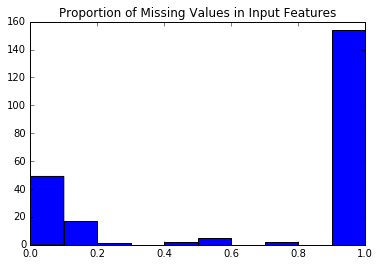

In [9]:
nb_train_samples = data_set_summaries.nb_samples['train']

input_features_missing_proportions = X_train.isnull().sum() / nb_train_samples

hist(input_features_missing_proportions)
title('Proportion of Missing Values in Input Features')

We can see that there are an awful lot of features with all missing data!! We'll kick them out, for sure. Also, there are a small handful of features that have over 20% missing data; since those are few and we are unlikely to miss out too many signals by removing them, let's not mess around with them either. In sum, we'll remove all features that have over 20% missing value:

In [10]:
x_var_names = input_features_missing_proportions[input_features_missing_proportions <= .2].index

x_var_names

Index([u'Var6', u'Var7', u'Var13', u'Var21', u'Var22', u'Var24', u'Var25',
       u'Var28', u'Var35', u'Var38', u'Var44', u'Var57', u'Var65', u'Var73',
       u'Var74', u'Var76', u'Var78', u'Var81', u'Var83', u'Var85', u'Var109',
       u'Var112', u'Var113', u'Var119', u'Var123', u'Var125', u'Var132',
       u'Var133', u'Var134', u'Var140', u'Var143', u'Var144', u'Var149',
       u'Var153', u'Var160', u'Var163', u'Var173', u'Var181', u'Var192',
       u'Var193', u'Var195', u'Var196', u'Var197', u'Var198', u'Var199',
       u'Var202', u'Var203', u'Var204', u'Var205', u'Var206', u'Var207',
       u'Var208', u'Var210', u'Var211', u'Var212', u'Var216', u'Var217',
       u'Var218', u'Var219', u'Var220', u'Var221', u'Var222', u'Var223',
       u'Var226', u'Var227', u'Var228'],
      dtype='object')

The number of remaining variables is:

In [11]:
len(x_var_names)

66

The classes of these variables are:

In [12]:
X_train = X_train[x_var_names]

x_types = {x_var_name: X_train[x_var_name].dtype for x_var_name in x_var_names}

x_types

{'Var109': dtype('float64'),
 'Var112': dtype('float64'),
 'Var113': dtype('float64'),
 'Var119': dtype('float64'),
 'Var123': dtype('float64'),
 'Var125': dtype('float64'),
 'Var13': dtype('float64'),
 'Var132': dtype('float64'),
 'Var133': dtype('float64'),
 'Var134': dtype('float64'),
 'Var140': dtype('float64'),
 'Var143': dtype('float64'),
 'Var144': dtype('float64'),
 'Var149': dtype('float64'),
 'Var153': dtype('float64'),
 'Var160': dtype('float64'),
 'Var163': dtype('float64'),
 'Var173': dtype('float64'),
 'Var181': dtype('float64'),
 'Var192': category,
 'Var193': category,
 'Var195': category,
 'Var196': category,
 'Var197': category,
 'Var198': category,
 'Var199': category,
 'Var202': category,
 'Var203': category,
 'Var204': category,
 'Var205': category,
 'Var206': category,
 'Var207': category,
 'Var208': category,
 'Var21': dtype('float64'),
 'Var210': category,
 'Var211': category,
 'Var212': category,
 'Var216': category,
 'Var217': category,
 'Var218': category,
 '

## Filling Missing Numeric $x$'s with Means

The following $x$'s are **float**:

In [13]:
float_x_var_names = [x_var_name for x_var_name in x_var_names
                     if x_types[x_var_name] == float]

float_x_var_names

['Var6',
 'Var7',
 'Var13',
 'Var21',
 'Var22',
 'Var24',
 'Var25',
 'Var28',
 'Var35',
 'Var38',
 'Var44',
 'Var57',
 'Var65',
 'Var73',
 'Var74',
 'Var76',
 'Var78',
 'Var81',
 'Var83',
 'Var85',
 'Var109',
 'Var112',
 'Var113',
 'Var119',
 'Var123',
 'Var125',
 'Var132',
 'Var133',
 'Var134',
 'Var140',
 'Var143',
 'Var144',
 'Var149',
 'Var153',
 'Var160',
 'Var163',
 'Var173',
 'Var181']

It seems we don't have a problem with numeric columns made up of non-changing values:

In [14]:
X_train[float_x_var_names].std()

Var6         2784.331264
Var7            6.417840
Var13        3224.769937
Var21         632.367810
Var22         789.538696
Var24           9.920501
Var25         210.904561
Var28          96.207726
Var35           2.991429
Var38     2980485.811293
Var44           1.969960
Var57           2.024096
Var65          10.189408
Var73          52.605083
Var74        1272.292295
Var76     1857630.865145
Var78           2.115707
Var81      103796.947542
Var83         107.624057
Var85          22.811409
Var109        168.756458
Var112        173.179715
Var113     760621.034559
Var119       2314.433389
Var123        246.135589
Var125      75609.369490
Var132         10.115018
Var133    2429869.349735
Var134     596797.295952
Var140       2973.142792
Var143          0.685315
Var144         11.784817
Var149     669042.761107
Var153    4348803.548855
Var160        111.513810
Var163     847186.519546
Var173          0.135186
Var181          2.517231
dtype: float64

The missing value proportions of the float columns are:

In [15]:
X_train[float_x_var_names].isnull().sum() / nb_train_samples

Var6      0.107933
Var7      0.108333
Var13     0.108333
Var21     0.107933
Var22     0.097733
Var24     0.142000
Var25     0.097733
Var28     0.097733
Var35     0.097733
Var38     0.097733
Var44     0.097733
Var57     0.000000
Var65     0.108333
Var73     0.000000
Var74     0.108333
Var76     0.097733
Var78     0.097733
Var81     0.107933
Var83     0.097733
Var85     0.097733
Var109    0.142000
Var112    0.097733
Var113    0.000000
Var119    0.107933
Var123    0.097733
Var125    0.108333
Var132    0.097733
Var133    0.097733
Var134    0.097733
Var140    0.108333
Var143    0.097733
Var144    0.107933
Var149    0.142000
Var153    0.097733
Var160    0.097733
Var163    0.097733
Var173    0.097733
Var181    0.097733
dtype: float64

Let’s fill up the missing values with the means of the respective columns:

In [16]:
float_x_means = X_train.mean()

for float_x_var_name in float_x_var_names:
    x = X_train[float_x_var_name]
    missing_value_row_yesno = x.isnull()
    if missing_value_row_yesno.sum() > 0:
        X_train.ix[missing_value_row_yesno.tolist(), float_x_var_name] =\
            float_x_means[float_x_var_name]

The missing values are now filled up:

In [17]:
X_train[float_x_var_names].isnull().sum() / nb_train_samples

Var6      0
Var7      0
Var13     0
Var21     0
Var22     0
Var24     0
Var25     0
Var28     0
Var35     0
Var38     0
Var44     0
Var57     0
Var65     0
Var73     0
Var74     0
Var76     0
Var78     0
Var81     0
Var83     0
Var85     0
Var109    0
Var112    0
Var113    0
Var119    0
Var123    0
Var125    0
Var132    0
Var133    0
Var134    0
Var140    0
Var143    0
Var144    0
Var149    0
Var153    0
Var160    0
Var163    0
Var173    0
Var181    0
dtype: float64

and the means stay the same as before:

In [18]:
allclose(X_train.mean(), float_x_means)

True

## Cleaning Categorical Variables

Below are categorical features and their number of categories:

In [19]:
categorical_x_var_names = [x_var_name for x_var_name in x_var_names
                           if x_types[x_var_name] != float]

categorical_x_nb_levels = X_train[categorical_x_var_names].apply(lambda col: len(col.cat.categories))

categorical_x_nb_levels

Var192      361
Var193       51
Var195       23
Var196        4
Var197      225
Var198     4291
Var199     5073
Var202     5713
Var203        5
Var204      100
Var205        3
Var206       21
Var207       14
Var208        2
Var210        6
Var211        2
Var212       81
Var216     2016
Var217    13990
Var218        2
Var219       22
Var220     4291
Var221        7
Var222     4291
Var223        4
Var226       23
Var227        7
Var228       30
dtype: int64

Those variables having over 500 categories are likely to be just text / character data. Let's get rid of them:

In [20]:
categorical_x_var_names = categorical_x_nb_levels[categorical_x_nb_levels <= 500].index

categorical_x_var_names

Index([u'Var192', u'Var193', u'Var195', u'Var196', u'Var197', u'Var203',
       u'Var204', u'Var205', u'Var206', u'Var207', u'Var208', u'Var210',
       u'Var211', u'Var212', u'Var218', u'Var219', u'Var221', u'Var223',
       u'Var226', u'Var227', u'Var228'],
      dtype='object')

For the remaining categorical variables, let's:

- Make their missing values another category _**zzzMISSING**_; and

- Try to consolidate the categories, as having too many categories make modeling less meaningful and numerically more difficult; for each variable, we'll collapse all categories with prevalence of under 5% together into a _**zzzOTHER**_ category;

- Drop categorical variables with only one category _(obviously)_; and

- Drop categorical variables with only one non-_**zzzMISSING**_ category.

In [21]:
collapsed_categories = {}
removed_categorical_x_var_names = set()

for categorical_x_var_name in categorical_x_var_names:
  
    missing_value_row_yesno = X_train[categorical_x_var_name].isnull()
    if missing_value_row_yesno.sum() > 0:
        X_train[categorical_x_var_name].cat.add_categories('zzzMISSING', inplace=True)
        X_train.ix[missing_value_row_yesno.tolist(), categorical_x_var_name] = 'zzzMISSING'

    x = X_train[categorical_x_var_name].copy()
    for category in x.cat.categories:
        matching_rows_yesno = x == category
        if matching_rows_yesno.sum() < .05 * nb_train_samples:
            if categorical_x_var_name in collapsed_categories:
                collapsed_categories[categorical_x_var_name].append(category) 
            else:
                collapsed_categories[categorical_x_var_name] = [category]
            if 'zzzOTHER' not in X_train[categorical_x_var_name].cat.categories:
                X_train[categorical_x_var_name].cat.add_categories('zzzOTHER', inplace=True)
            X_train.ix[matching_rows_yesno, categorical_x_var_name] = 'zzzOTHER'
            X_train[categorical_x_var_name].cat.remove_categories(category, inplace=True)
  
    categories = X_train[categorical_x_var_name].cat.categories
    if (len(categories) == 1) or\
        (len(set(categories) - set(['zzzMISSING', 'zzzOTHER'])) < 2):
        removed_categorical_x_var_names.add(categorical_x_var_name)

categorical_x_var_names = list(set(categorical_x_var_names) - removed_categorical_x_var_names)

Let's double-check by looking at the prevalence of the categories of the remaining categorical variables now:

In [22]:
for categorical_x_var_name in categorical_x_var_names:
    printflush(categorical_x_var_name.upper(), ':', sep='')
    x = X_train[categorical_x_var_name]
    printflush(
        Series({category: (x == category).sum() / nb_train_samples\
         for category in x.cat.categories}))
    printflush()

VAR227:
6fzt        0.0654
RAYp        0.7010
ZI9m        0.1238
zzzOTHER    0.1098
dtype: float64

VAR226:
7P5s        0.056467
Aoh3        0.050133
FSa2        0.159267
Qu4f        0.101133
WqMG        0.082267
fKCe        0.052200
szEZ        0.059333
zzzOTHER    0.439200
dtype: float64

VAR223:
LM8l689qOp    0.731133
jySVZNlOJy    0.120600
zzzMISSING    0.105400
zzzOTHER      0.042867
dtype: float64

VAR221:
d0EEeJi     0.065133
oslk        0.735333
zCkv        0.122333
zzzOTHER    0.077200
dtype: float64

VAR203:
9_Y1        0.907200
HLqf        0.061467
zzzOTHER    0.031333
dtype: float64

VAR228:
55YFVY9          0.087000
F2FyR07IdsN7I    0.655467
ib5G6X1eUxUn6    0.054200
zzzOTHER         0.203333
dtype: float64

VAR208:
kIsH        0.9210
sBgB        0.0762
zzzOTHER    0.0028
dtype: float64

VAR218:
UYBR        0.482600
cJvF        0.503333
zzzOTHER    0.014067
dtype: float64

VAR205:
09_Q        0.227333
VpdQ        0.643933
sJzTlal     0.090133
zzzOTHER    0.038600
dtype: fl

Not bad, _eh_?, not bad... It seems we can embark now on the next steps: **variable selection**.

# Selecting Candidate Input Features $x$'s

The number of remaining $x$ features is:

In [23]:
x_var_names = list(float_x_var_names) + list(categorical_x_var_names)

X_train = X_train[x_var_names]

nb_x_vars = len(x_var_names)

nb_x_vars

53

Building models with all of them will still be quite clunky. Let's try to select features containing good amounts of "signals" by:

1. Fitting Random Forests on pairs of features and measuring the OOS performances of such Random Forests on the Validation set
2. Pick pairs of higher OOB performances
3. Pick variables that appear in many well-performing pairs

Let's first prepare the Validation set:

In [24]:
def prepare_X_OOS(X_OOS,
                  float_x_var_names=float_x_var_names,
                  categorical_x_var_names=categorical_x_var_names):
    
    X_OOS = X_OOS[list(float_x_var_names) + list(categorical_x_var_names)]

    for float_x_var_name in float_x_var_names:
        x = X_OOS[float_x_var_name]
        missing_value_row_yesno = x.isnull()
        if missing_value_row_yesno.sum() > 0:
            X_OOS.ix[missing_value_row_yesno.tolist(), float_x_var_name] =\
                float_x_means[float_x_var_name]

    for categorical_x_var_name in categorical_x_var_names:

        missing_value_row_yesno = X_OOS[categorical_x_var_name].isnull()
        if missing_value_row_yesno.sum() > 0:
            X_OOS[categorical_x_var_name].cat.add_categories('zzzMISSING', inplace=True)
            X_OOS.ix[missing_value_row_yesno.tolist(), categorical_x_var_name] = 'zzzMISSING'

        if categorical_x_var_name in collapsed_categories:
            X_OOS[categorical_x_var_name].cat.add_categories('zzzOTHER', inplace=True)
            x = X_OOS[categorical_x_var_name].copy()
            for category in collapsed_categories[categorical_x_var_name]:
                matching_rows_yesno = x == category
                X_OOS.ix[matching_rows_yesno, categorical_x_var_name] = 'zzzOTHER'
                X_OOS[categorical_x_var_name].cat.remove_categories(category, inplace=True)
    
    return X_OOS

X_valid = prepare_X_OOS(X_valid)

/Applications/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [25]:
feature_pair_performances = DataFrame(
    columns=['feature_1', 'feature_2', 'deviance'])
row_nb = -1

for i in range(nb_x_vars - 1):
 
    feature_1 = x_var_names[i]
  
    for j in range(i + 1, nb_x_vars):
   
        printflush('(', i + 1, ', ', j + 1, ');', sep='', end=' ')
   
        feature_2 = x_var_names[j]
       
        B = 30

        rf_model = RandomForestClassifier(
            n_estimators=B,
            criterion='entropy',
            max_depth=None,   # expand until all leaves are pure or contain < MIN_SAMPLES_SPLIT samples
            min_samples_split=300,
            min_samples_leaf=150,
            min_weight_fraction_leaf=0.0,
            max_features=None,   # number of features to consider when looking for the best split; None: max_features=n_features
            max_leaf_nodes=None,   # None: unlimited number of leaf nodes
            bootstrap=True,
            oob_score=True,   # estimate Out-of-Bag Cross Entropy
            n_jobs=cpu_count() - 2,   # paralellize over all CPU cores but 2
            class_weight=None,    # our classes are skewed, but but too skewed
            random_state=RANDOM_SEED,
            verbose=0,
            warm_start=False)
        
        rf_model.fit(X=get_dummies(X_train[[feature_1, feature_2]]), y=churn_train)
        valid_pred_probs = rf_model.predict_proba(X=get_dummies(X_valid[[feature_1, feature_2]]))[:, 1]
        row_nb += 1
        feature_pair_performances.loc[row_nb, :] =\
            feature_1, feature_2,\
            bin_class_dev(
                p_hat=valid_pred_probs,
                y=churn_valid,
                pos_cat='yes')

(1, 2); (1, 3); (1, 4); (1, 5); (1, 6); (1, 7); (1, 8); (1, 9); (1, 10); (1, 11); (1, 12); (1, 13); (1, 14); (1, 15); (1, 16); (1, 17); (1, 18); (1, 19); (1, 20); (1, 21); (1, 22); (1, 23); (1, 24); (1, 25); (1, 26); (1, 27); (1, 28); (1, 29); (1, 30); (1, 31); (1, 32); (1, 33); (1, 34); (1, 35); (1, 36); (1, 37); (1, 38); (1, 39); (1, 40); (1, 41); (1, 42); (1, 43); (1, 44); (1, 45); (1, 46); (1, 47); (1, 48); (1, 49); (1, 50); (1, 51); (1, 52); (1, 53); (2, 3); (2, 4); (2, 5); (2, 6); (2, 7); (2, 8); (2, 9); (2, 10); (2, 11); (2, 12); (2, 13); (2, 14); (2, 15); (2, 16); (2, 17); (2, 18); (2, 19); (2, 20); (2, 21); (2, 22); (2, 23); (2, 24); (2, 25); (2, 26); (2, 27); (2, 28); (2, 29); (2, 30); (2, 31); (2, 32); (2, 33); (2, 34); (2, 35); (2, 36); (2, 37); (2, 38); (2, 39); (2, 40); (2, 41); (2, 42); (2, 43); (2, 44); (2, 45); (2, 46); (2, 47); (2, 48); (2, 49); (2, 50); (2, 51); (2, 52); (2, 53); (3, 4); (3, 5); (3, 6); (3, 7); (3, 8); (3, 9); (3, 10); (3, 11); (3, 12); (3, 13); (3, 

In [26]:
feature_pair_performances.sort('deviance', inplace=True)

feature_pair_performances

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,feature_1,feature_2,deviance
1327,Var203,Var197,5.22178
1324,Var203,Var208,5.22286
1344,Var208,Var197,5.22337
1301,Var223,Var203,5.22515
1303,Var223,Var208,5.22904
1306,Var223,Var197,5.22993
1332,Var203,Var211,5.23237
1141,Var143,Var197,5.2324
1349,Var208,Var211,5.23259
1247,Var173,Var203,5.23267


(array([  1.,   0.,   2.,   0.,   6.,   5.,   7.,   6.,   5.,  13.]),
 array([  3.,   7.,  11.,  15.,  19.,  23.,  27.,  31.,  35.,  39.,  43.]),
 <a list of 10 Patch objects>)

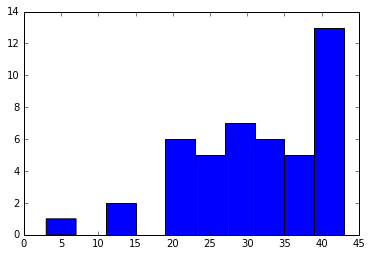

In [27]:
feature_pair_performances_top_half =\
    feature_pair_performances.iloc[range(int(len(feature_pair_performances) / 2)), :]

good_feature_appearance_counts = {}

for i in range(len(feature_pair_performances_top_half)):
  
    feature_1 = feature_pair_performances_top_half.feature_1.iloc[i]
    if feature_1 in good_feature_appearance_counts:
        good_feature_appearance_counts[feature_1] += 1
    else:
        good_feature_appearance_counts[feature_1] = 1

    feature_2 = feature_pair_performances_top_half.feature_2.iloc[i]
    if feature_2 in good_feature_appearance_counts:
        good_feature_appearance_counts[feature_2] += 1
    else:
        good_feature_appearance_counts[feature_2] = 1

good_feature_appearance_counts = Series(good_feature_appearance_counts)
        
hist(good_feature_appearance_counts)

Let's pick the features that appear over 20 times in the "good feature appearances".

In [28]:
x_var_names = good_feature_appearance_counts[good_feature_appearance_counts > 20].index

x_types = {x_var_name: X_train[x_var_name].dtype for x_var_name in x_var_names}
float_x_var_names = [x_var_name for x_var_name in x_var_names
                     if x_types[x_var_name] == float]
categorical_x_var_names = [x_var_name for x_var_name in x_var_names
                           if x_types[x_var_name] != float]
x_var_names = list(float_x_var_names) + list(categorical_x_var_names)

X_train = X_train[x_var_names]
X_valid = X_valid[x_var_names]

# Classification Models

Let's train 2 types of classification models: a Random Forest and a Boosted Trees model:

In [29]:
B = 1200

rf_model = RandomForestClassifier(
    n_estimators=B,
    criterion='entropy',
    max_depth=None,   # expand until all leaves are pure or contain < MIN_SAMPLES_SPLIT samples
    min_samples_split=100,
    min_samples_leaf=50,
    min_weight_fraction_leaf=0.0,
    max_features=None,   # number of features to consider when looking for the best split; None: max_features=n_features
    max_leaf_nodes=None,   # None: unlimited number of leaf nodes
    bootstrap=True,
    oob_score=True,   # estimate Out-of-Bag Cross Entropy
    n_jobs=cpu_count() - 2,   # paralellize over all CPU cores but 2
    class_weight=None,    # our classes are skewed, but but too skewed
    random_state=RANDOM_SEED,
    verbose=0,
    warm_start=False)

rf_model.fit(X=get_dummies(X_train), y=churn_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=6,
            oob_score=True, random_state=99, verbose=0, warm_start=False)

In [30]:
B = 2400

boost_model = GradientBoostingClassifier(
    n_estimators=B,
    loss='deviance',   # a.k.a Cross Entropy in Classification
    learning_rate=.01,   # shrinkage parameter
    subsample=1.,
    min_samples_split=200,
    min_samples_leaf=100,
    min_weight_fraction_leaf=0.0,
    max_depth=10,   # maximum tree depth / number of levels of interaction
    init=None,
    random_state=RANDOM_SEED,
    max_features=None,   # number of features to consider when looking for the best split; None: max_features=n_features
    verbose=0,
    max_leaf_nodes=None,   # None: unlimited number of leaf nodes
    warm_start=False)

boost_model.fit(X=get_dummies(X_train), y=churn_train)

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=10, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=100, min_samples_split=200,
              min_weight_fraction_leaf=0.0, n_estimators=2400,
              presort='auto', random_state=99, subsample=1.0, verbose=0,
              warm_start=False)

We'll now evaluate the OOS performances of these 2 models on the Validation set to select a model we think is better:

In [31]:
low_prob = 1e-6
high_prob = 1 - low_prob
log_low_prob = log(low_prob)
log_high_prob = log(high_prob)
log_prob_thresholds = linspace(start=log_low_prob, stop=log_high_prob, num=100)
prob_thresholds = exp(log_prob_thresholds)

In [32]:
rf_pred_probs = rf_model.predict_proba(X=get_dummies(X_valid))
rf_oos_performance = bin_classif_eval(
    rf_pred_probs[:, 1], churn_valid == 'yes',
    pos_cat='yes', thresholds=prob_thresholds)

In [33]:
boost_pred_probs = boost_model.predict_proba(X=get_dummies(X_valid))
boost_oos_performance = bin_classif_eval(
    boost_pred_probs[:, 1], churn_valid == 'yes', 
    pos_cat='yes', thresholds=prob_thresholds)

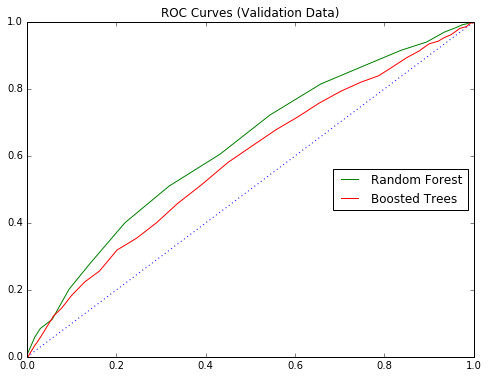

In [34]:
figure(figsize=(8, 6))
plot(
    [0, 1], [0, 1],
    linestyle='dotted')
plot(
    1 - rf_oos_performance.specificity,
    rf_oos_performance.recall,
    label='Random Forest')
plot(
    1 - boost_oos_performance.specificity,
    boost_oos_performance.recall,
    label='Boosted Trees')
title('ROC Curves (Validation Data)')
legend(loc='right')

It seems that the Boosted Trees model offers a much better classification performance than the Random Forest. We now need to pick a decision threshold for the Boosted Trees model. If we are to be really rigorous, we’ll need balance the costs of lost business and the costs of extra incentives to retain customers. Here, to make life simple, we’ll pick a subjective threshold that enables us to anticipate 25% of the churn cases.

In [35]:
recall_threshold = .25
idx = next(i for i in range(100) if boost_oos_performance.recall[i] <= recall_threshold) - 1
selected_prob_threshold = prob_thresholds[idx]
selected_prob_threshold

0.093260257442381714

The OOS performance of the Boosted Trees algorithm at this threshold is as follows:

In [36]:
boost_oos_performance.iloc[idx, :]

threshold      0.093260
accuracy       0.795400
recall         0.256131
specificity    0.838118
precision      0.111374
f1_score       0.155244
deviance       0.564808
Name: 82, dtype: float64

Note that the precision of the model at this sensitivity threshold is rather low, meaning that there’ll be many false positives. We’ll probably need business insights to decide whether to contact certain customers over other, and what incentives to offer them.

# Test Performance of Selected Model

Let's first prepare the Test data for prediction:

In [37]:
X_test = prepare_X_OOS(
    X_test,
    float_x_var_names=float_x_var_names,
    categorical_x_var_names=categorical_x_var_names)

Let's then evaluate the performance of the selected Boosted Trees model at the decision threshold determined above:

In [38]:
boost_test_pred_probs = boost_model.predict_proba(X=get_dummies(X_test))

boost_test_oos_performance = bin_classif_eval(
    boost_test_pred_probs[:, 1], churn_test == 'yes',
    pos_cat='yes', thresholds=selected_prob_threshold)

boost_test_oos_performance

{'accuracy': 0.80253333333333332,
 'deviance': 0.5474942443254841,
 'f1_score': 0.1705404648557827,
 'precision': 0.12330431261388945,
 'recall': 0.27644121652292331,
 'specificity': 0.84422779436629847}

We can see that the Test performance is very similar to what we've estimated from the Validation set. The selected model works as expected.